In [15]:
# Import all necessary libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)
np.random.seed(42)

print(tf.__version__)

2.15.0


In [21]:
# Loading the CSV file using Pandas library

df = pd.read_csv('/content/Concrete_Data.csv')

# prints the first five entries by default.
df.head()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [22]:
X=df.drop('strength',axis='columns')

In [23]:
y=df.strength

In [24]:
X

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [25]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [31]:
df.isnull().sum()

Cement              0
Slag                0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
strength            0
dtype: int64

In [26]:
X.describe()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(824, 8)
(206, 8)


In [34]:
y_train.shape

(824,)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [36]:
y_train.shape

(824, 1)

In [37]:
X_train_std.shape

(824, 8)

In [38]:
X_train_std.shape[1:]

(8,)

In [64]:
# Create the network using Functional API method
#--> Write the rules for network with following settings:
#--> 8 units for Input-layer
#--> 1 units for Hidden-layer-1
#--> 1 unit for Output-layer

input_ = keras.layers.Input(shape = X_train_std.shape[1:])

x = keras.layers.Dense(units=100, activation='relu')(input_)
x = keras.layers.Dense(units=50, activation='relu')(x)

output_ = keras.layers.Dense(units=1, activation='linear')(x)

In [65]:
model_DNN = keras.Model(inputs=[input_], outputs=[output_])

In [66]:
model_DNN.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_8 (Dense)             (None, 100)               900       
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6001 (23.44 KB)
Trainable params: 6001 (23.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


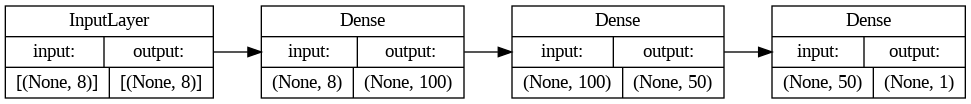

In [67]:
tf.keras.utils.plot_model(
    model_DNN,
    to_file = 'model_DNN.png',
    show_shapes = True,
    show_dtype = False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [68]:
# custom R2-score metrics for keras backend
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [69]:
#--> Compile with approriate settings for the model
model_DNN.compile(loss='mse',
                  optimizer='adam',
                  metrics=[r2_keras])

In [72]:
history_DNN = model_DNN.fit(x = X_train_std,
                            y = y_train,
                            epochs = 150,
                            validation_split = 0.1,
                            batch_size = 32)

Epoch 1/150
24/24 [==============================] - 0s 9ms/step - loss: 14.1520 - r2_keras: 0.9473 - val_loss: 29.4174 - val_r2_keras: 0.8661
Epoch 2/150
24/24 [==============================] - 0s 14ms/step - loss: 14.8137 - r2_keras: 0.9432 - val_loss: 31.4993 - val_r2_keras: 0.8578
Epoch 3/150
24/24 [==============================] - 0s 5ms/step - loss: 14.3063 - r2_keras: 0.9453 - val_loss: 29.3793 - val_r2_keras: 0.8657
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 14.6417 - r2_keras: 0.9450 - val_loss: 28.7670 - val_r2_keras: 0.8678
Epoch 5/150
24/24 [==============================] - 0s 3ms/step - loss: 13.9941 - r2_keras: 0.9463 - val_loss: 30.3392 - val_r2_keras: 0.8621
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 13.8994 - r2_keras: 0.9483 - val_loss: 28.5581 - val_r2_keras: 0.8701
Epoch 7/150
24/24 [==============================] - 0s 4ms/step - loss: 13.9276 - r2_keras: 0.9458 - val_loss: 29.4987 - val_r2_keras: 0.865

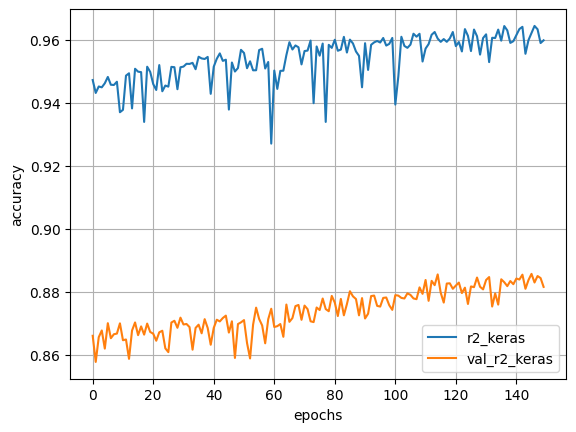

In [74]:
keys = ['r2_keras', 'val_r2_keras']
progress = {k:v for k,v in history_DNN.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [73]:
test_loss, test_accuracy = model_DNN.evaluate(X_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss, test_accuracy))

7/7 [==============================] - 0s 2ms/step - loss: 38.9574 - r2_keras: 0.8438
Test-loss: 38.957378, Test-accuracy: 0.843751
